<!--NAVIGATION-->
< [误差可视化](04.03-Errorbars.ipynb) | [目录](Index.ipynb) | [直方图, 分桶和密度](04.05-Histograms-and-Binnings.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.04-Density-and-Contour-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Density and Contour Plots

# 密度和輪廓圖

> Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.
This section looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

有些情況下，我們需要在二維圖表中使用輪廓或顏色區域來展示三維的數據（可以設想等高線地圖或溫度分佈圖）。 Matplotlib提供了三個有用的函數來處理這項任務：`plt.contour`繪製輪廓圖，`plt.contourf`來繪製填充區域顏色的圖表以及`plt.imshow`來展示圖像。本節會介紹幾個使用它們的例子。當然我們還是首先從將需要使用的包導入notebook和初始化工作開始：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Visualizing a Three-Dimensional Function

## 三維可視化函數

> We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$ (we've seen this before in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb), when we used it as a motivating example for array broadcasting):

我們首先使用一個簡單的函數$z = f(x, y)$繪製一個輪廓圖來進行說明，下面的這個函數我們在[在數組上計算：廣播](02.05-Computation-on-arrays-broadcasting.ipynb)一節中已經見過，那裡我們用來作為數組廣播運算的例子：

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

> A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

輪廓圖可以使用`plt.contour`函數進行創建。它接收三個參數：*x*參數代表三維網格的平面橫軸坐標，*y*參數代表三維網格的平面縱軸坐標，而*z*參數代表三維網格的高度坐標。最容易用來準備這種網格數據的是`np.meshgrid`函數，可以將兩個一維的數組構造成一個二維的網格：

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

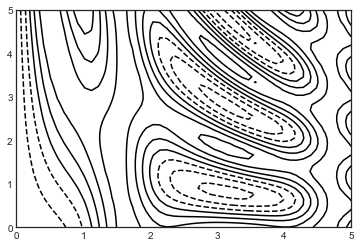

In [4]:
plt.contour(X, Y, Z, colors='black');

> Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

圖中值得注意的是，當使用單色繪製輪廓圖時，虛線代表的是負數的數值，而實線代表的是正數。而輪廓線可以通過指定`cmap`參數來設置線條的色圖。下例中展示了使用色圖且繪製了更多的輪廓線的例子，會在整個數據范圍區域內等距分佈有20條輪廓線：

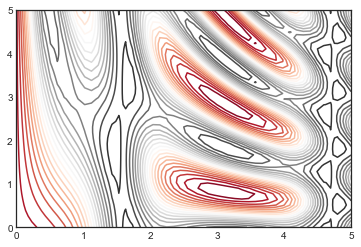

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

> Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:

上例中我们选择了`RdGy`（*Red-Gray*的缩写）色图，这对于聚集的数据来说是一个不错的选择。Matplotlib有大量的颜色图可供使用，你可以通过在IPython中对`plt.cm`模块使用TAB自动补全方法就可以看到：

```
plt.cm.<TAB>
```

> Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

上面的图看起来比第一幅图好多了，但是线条之间的空隙还是有点让人混淆。我们可以将上面的图改为填充轮廓图来解决这个问题，使用`plt.contourf()`函数（注意函数名最后有个f，代表填充fill），这个函数的语法基本上与`plt.contour()`保持一致。

> Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

并且我们加上了`plt.colorbar()`函数，这个函数会在图表边上创建一个颜色图例用以展示颜色所表示的数值区域：

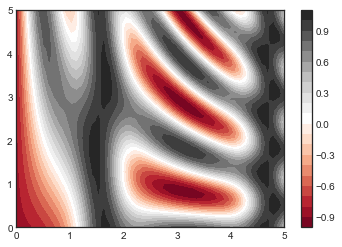

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

> The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

有了图例，很容易可以看出黑色区域代表着“峰”，而红色区域代表这“谷”。

> One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired.
This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level.
A better way to handle this is to use the ``plt.imshow()`` function, which interprets a two-dimensional grid of data as an image.

上图有一个缺点，那就是图中颜色的阶梯是离散的而不是连续的，这通常不是我们想要的。我们可以通过设置很高的轮廓线数量来改善，但是这会导致绘制图表的性能降低：Matplotlib必须在每个颜色阶梯上绘制一条新的轮廓多边形。更好的办法是使用`plt.imshow()`函数，它会将一个二维的网格图表转换为一张图像。

> The following code shows this:

下面的例子展示了该方法：

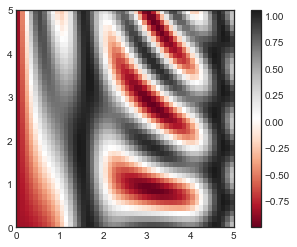

In [10]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',cmap='RdGy')
plt.colorbar();

> Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

最後，有時可能需要將輪廓圖和圖像結合起來。例如，下例中我們使用了半透明的背景圖像（通過`alpha`參數設置透明度），然後在背景圖層之上繪製了輪廓圖，並帶有每個輪廓的數值標籤（使用`plt.clabel()`函數繪製標籤）：

- `plt.imshow()`不接受x和y網格值作為參數，因此你需要手動指定*extent*參數[*xmin*, *xmax*, *ymin*, *ymax*]來設置圖表的數據范圍。
- `plt.imshow()`使用的是默認的圖像坐標，即左上角坐標點是原點，而不是通常圖表的左下角坐標點。這可以通過設置`origin`參數來設置。
- `plt.imshow()`會自動根據輸入數據調整坐標軸的比例；這可以通過參數來設置，例如，`plt.axis(aspect='image')`能讓x和y軸的單位一致。

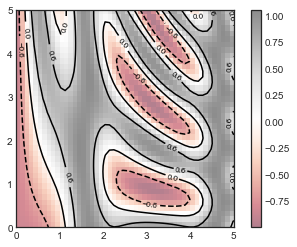

In [9]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

> The combination of these three functions—``plt.contour``, ``plt.contourf``, and ``plt.imshow``—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot.
For more information on the options available in these functions, refer to their docstrings.
If you are interested in three-dimensional visualizations of this type of data, see [Three-dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb).

通過組合使用`plt.contour`、`plt.contourf`和`plt.imshow`這三個函數，基本可以滿足我們繪製所有這種在二維圖標上的三維數據的需求。需要了解更多函數的參數信息，參考它們的文檔字符串。如果你對於使用三維圖表展示這種數據感興趣，參見[在matplotlib中創建三維圖表](04.12-Three-Dimensional-Plotting.ipynb)。

<!--NAVIGATION-->
< [误差可视化](04.03-Errorbars.ipynb) | [目录](Index.ipynb) | [直方图, 分桶和密度](04.05-Histograms-and-Binnings.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.04-Density-and-Contour-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
